#### To compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face.

In [2]:
import numpy as np
import pandas as pd
from sklearn import cluster, datasets as dt
from scipy import misc
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
face = sp.misc.face(gray = True)
n_clusters = 5
np.random.seed(0)
X = face.reshape((-1,1))
k_Means= cluster.KMeans(n_clusters=n_clusters,n_init=4, max_iter= 200)
k_Means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=5, n_init=4, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
labels = k_Means.labels_
values = k_Means.cluster_centers_.squeeze()
values
len(labels)

786432

In [5]:
face.shape

(768, 1024)

In [6]:
l = list(X)
len(l)

786432

In [7]:
Data = pd.DataFrame({'pixels':list(X), 'clusterNo':k_Means.labels_})
Data.head()

,clusterNo,pixels
0,0,[114]
1,0,[130]
2,4,[145]
3,4,[147]
4,4,[147]


In [8]:
Data_1 = Data.loc[Data.clusterNo == 0,'pixels']
Data_2 = Data.loc[Data.clusterNo == 1,'pixels']
Data_3 = Data.loc[Data.clusterNo == 2,'pixels']
Data_4 = Data.loc[Data.clusterNo == 3,'pixels']
Data_5 = Data.loc[Data.clusterNo == 4,'pixels']

In [9]:
Data_gray = Data_1.append(Data_2).append(Data_3).append(Data_4).append(Data_5)


In [10]:
Data_gray = np.uint8(Data_gray)
Data_gray


array([114, 130, 130, ..., 142, 141, 140], dtype=uint8)

In [11]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ..., 
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [12]:
len(Data_gray)

786432

In [13]:
len(Data_gray)

786432

In [14]:
Data_gray = Data_gray.reshape(-1, 1024)

In [15]:
type(Data_gray)

numpy.ndarray

In [16]:
Data_gray

array([[114, 130, 130, ..., 124, 114, 122],
       [128, 121, 119, ...,  97, 105, 121],
       [124, 106,  93, ..., 129, 129, 118],
       ..., 
       [140, 139, 137, ..., 145, 145, 144],
       [140, 143, 143, ..., 169, 170, 150],
       [134, 137, 143, ..., 142, 141, 140]], dtype=uint8)

In [17]:
Data_gray.shape

(768, 1024)

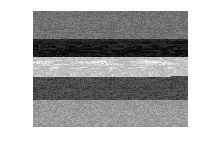

In [18]:
plt.figure(2, figsize=(3, 2.2))
plt.imshow(Data_gray, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


In [19]:
Data_gray.shape

(768, 1024)

In [20]:
Data_gray = np.choose(labels, values)
Data_gray.shape = face.shape

In [21]:
labels.shape

(786432,)

In [22]:
values.shape

(5,)

Original Image

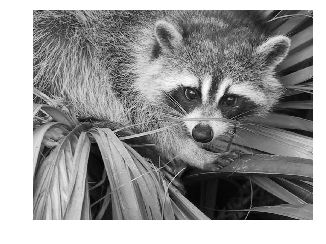

In [23]:
plt.figure(2, figsize=(8, 3.5))
plt.imshow(face, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


Compressed Image

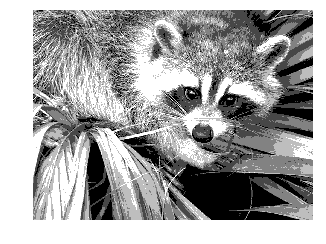

In [55]:
plt.figure(2, figsize=(8, 3.5))
plt.imshow(Data_gray, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()